<a href="https://colab.research.google.com/github/deva-kumari/devakumari_cse22237/blob/main/LAB3-O3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

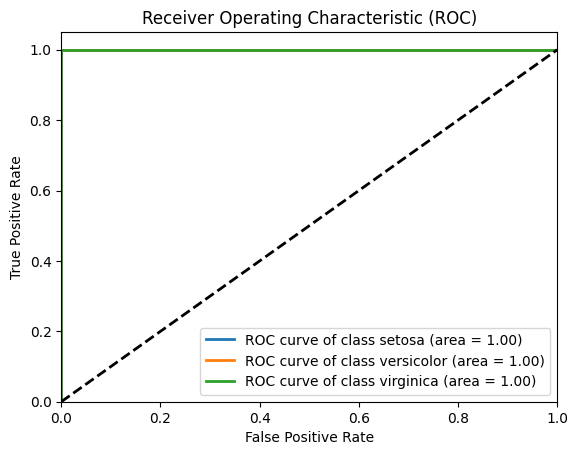

Class setosa - AUC: 1.00
Class versicolor - AUC: 1.00
Class virginica - AUC: 1.00


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize

# Load dataset
data = load_iris()
X = data.data
y = data.target
class_names = data.target_names

# Binarize the output
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_bin, test_size=0.3, random_state=42)

# Create the kNN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
neigh.fit(X_train, y_train)

# Get the predicted probabilities for each class
y_score = neigh.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[i][:, 1])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Print AUC for each class
for i in range(n_classes):
    print(f'Class {class_names[i]} - AUC: {roc_auc[i]:.2f}')
